**Seeding for reproducibility**

In [1]:
# Set seeds for reproducibility
import random
random.seed(7)

import numpy as np
np.random.seed(7)

import tensorflow as tf
tf.random.set_seed(7)

**Importing the dependencies**

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [3]:
import seaborn as sns
sns.set(style='whitegrid')


### Data Exploration Seaborn

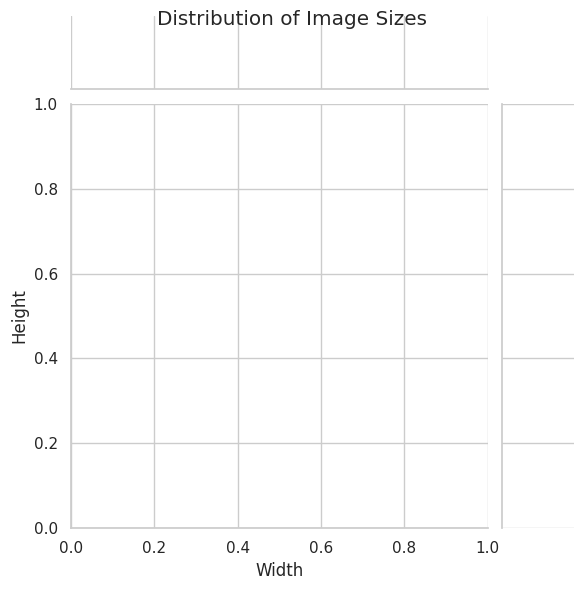

In [4]:
def plot_image_sizes(image_dir):
    image_sizes = []
    for dirname, _, filenames in os.walk(image_dir):
        for filename in filenames:
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(dirname, filename)
                with Image.open(image_path) as img:
                    image_sizes.append(img.size)

    sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
    sns.jointplot(x='Width', y='Height', data=sizes_df, kind='scatter')
    plt.suptitle('Distribution of Image Sizes')
    plt.show()

# Example usage:
plot_image_sizes('plantvillage dataset')


In [5]:
!pip install kaggle

In [6]:
kaggle_secrets = json.load(open("kaggle.json"))

In [7]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_secrets["username"]
os.environ['KAGGLE_KEY'] = kaggle_secrets["key"]

In [8]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
100% 2.04G/2.04G [00:17<00:00, 53.1MB/s]
100% 2.04G/2.04G [00:17<00:00, 127MB/s] 


In [9]:
!dir

kaggle.json  plantvillage-dataset.zip  sample_data


In [10]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [11]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
38
['Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Apple___Apple_scab']
38
['Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Apple___Apple_scab']
38
['Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Apple___Apple_scab']


**Number of Classes = 38**

In [12]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['bc9f03e8-d545-4ba9-a68d-7032b3c36670___Mt.N.V_HL 6075.JPG', '72cd93bf-63f6-476a-b3ae-43af2006c9f2___Mt.N.V_HL 6132.JPG', 'f229b33f-2257-49a7-a135-17d0ef3ca46b___Mt.N.V_HL 6033.JPG', '862c537a-d751-47bd-9c2c-385f7e9a9e97___Mt.N.V_HL 6054.JPG', '49a5f0af-64f3-4d78-bff0-607bac0ad17a___Mt.N.V_HL 6048.JPG']


**Data Preprocessing**

In [13]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


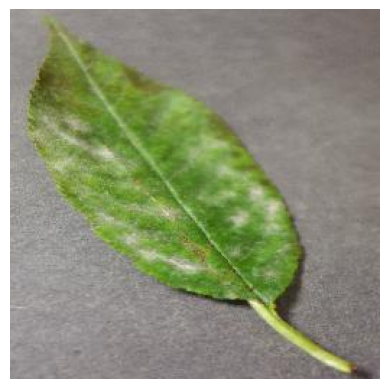

In [37]:
image_path = '/content/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew/00b7df55-c789-43d6-a02e-a579ac9d07e6___FREC_Pwd.M 4748.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [39]:
image_path = '/content/plantvillage dataset/color/Cherry_(including_sour)___Powdery_mildew/00b7df55-c789-43d6-a02e-a579ac9d07e6___FREC_Pwd.M 4748.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[161 157 154]
  [161 157 154]
  [161 157 154]
  ...
  [118 107 103]
  [118 107 103]
  [118 107 103]]

 [[158 154 151]
  [159 155 152]
  [159 155 152]
  ...
  [118 107 103]
  [118 107 103]
  [118 107 103]]

 [[155 151 148]
  [156 152 149]
  [156 152 149]
  ...
  [117 106 102]
  [117 106 102]
  [117 106 102]]

 ...

 [[147 143 144]
  [145 141 142]
  [147 143 144]
  ...
  [108  97 101]
  [115 104 108]
  [125 114 118]]

 [[147 143 144]
  [145 141 142]
  [147 143 144]
  ...
  [106  95  99]
  [110  99 103]
  [120 109 113]]

 [[149 145 146]
  [147 143 144]
  [148 144 145]
  ...
  [113 102 106]
  [117 106 110]
  [128 117 121]]]


In [16]:
# Image Parameters
img_size = 224
batch_size = 128

**Train Test Split**

In [17]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [18]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [19]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


**Convolutional Neural Network(CNN)**

In [20]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',# there are of course other options available
              metrics=['accuracy'])

**Model training**

In [23]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=2,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


339/339 ━━━━━━━━━━━━━━━━━━━━ 153s 405ms/step - accuracy: 0.5231 - loss: 2.3694 - val_accuracy: 0.8334 - val_loss: 0.5233
Epoch 2/2
  1/339 ━━━━━━━━━━━━━━━━━━━━ 1:04 192ms/step - accuracy: 0.8125 - loss: 0.5833

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8125 - loss: 0.5833 - val_accuracy: 0.8041 - val_loss: 0.6475


**Model Evaluation**

In [24]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
84/84 ━━━━━━━━━━━━━━━━━━━━ 22s 267ms/step - accuracy: 0.8269 - loss: 0.5612
Validation Accuracy: 83.07%


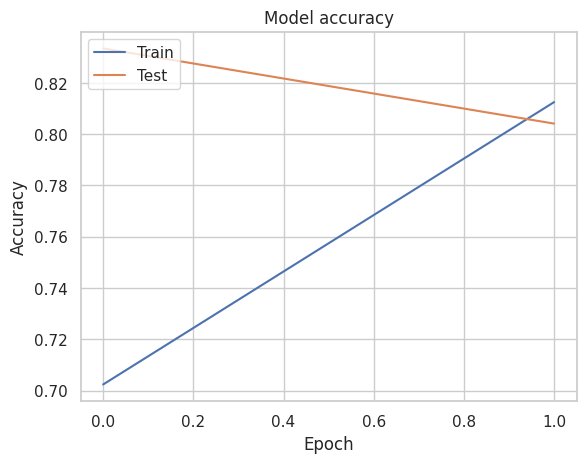

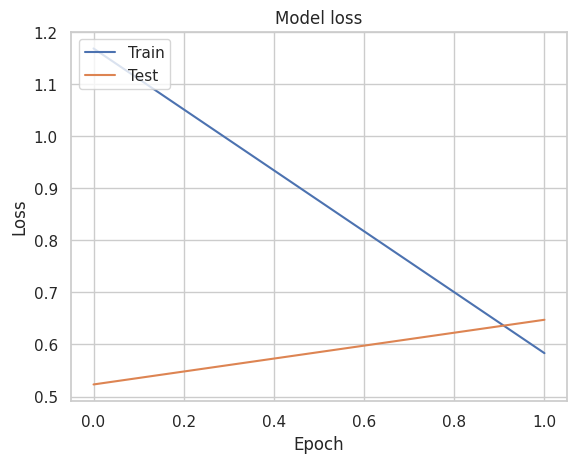

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

**Building a Predictive System**

In [26]:
# Pillow Preprocessing the image
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Adding new batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scaling the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [27]:
# dictionary from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [28]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [29]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [31]:
# Results
image_path = 'for_final_test/test_apple_black_rot.JPG'
#image_path = 'for_final_test/test_blueberry_healthy.jpg'
#image_path = 'for_final_test/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 966ms/step
Predicted Class Name: Apple___Black_rot


In [32]:
# Results
#image_path = 'for_final_test/test_apple_black_rot.JPG'
image_path = 'for_final_test/test_blueberry_healthy.jpg'
#image_path = 'for_final_test/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class Name: Blueberry___healthy


In [33]:
# Results
#image_path = 'for_final_test/test_apple_black_rot.JPG'
#image_path = 'for_final_test/test_blueberry_healthy.jpg'
image_path = 'for_final_test/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Class Name: Potato___Early_blight


**Saving the model(h5 and keras)**

In [34]:
#model.save('trained_models/plant_disease_prediction_model.h5')

In [36]:

model.save('plant_disease_prediction_model.keras')

In [41]:
model.save('plant_disease_prediction_model.h5')